In [1]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


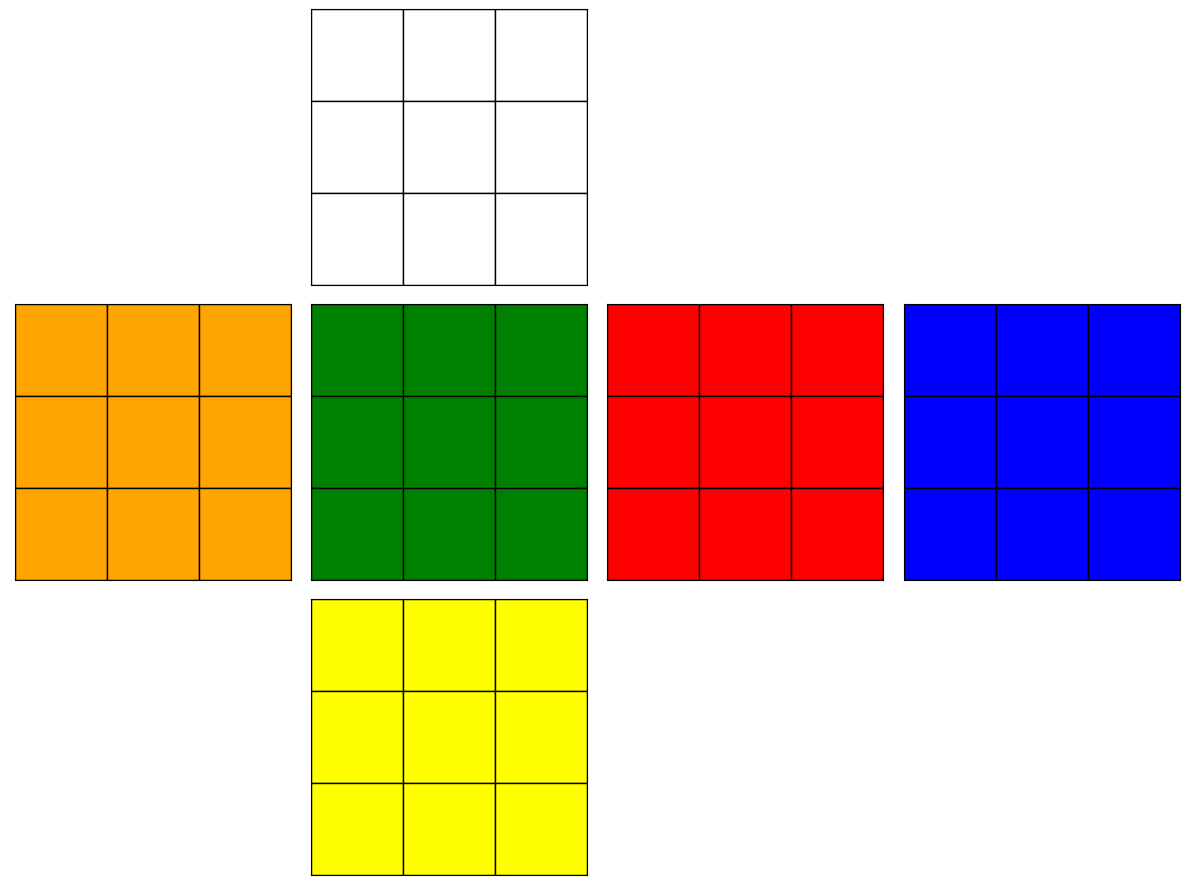

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Mapping from cube colors to RGB
color_map = {
    'W': 'white',
    'G': 'green',
    'R': 'red',
    'B': 'blue',
    'O': 'orange',
    'Y': 'yellow'
}

# Ask the user for the colors on each face
def get_cube_configuration():
    configuration = {}
    faces = ['U', 'L', 'F', 'R', 'B', 'D']
    print("Enter the colors for each face of the Rubik's cube using W, G, R, B, O, Y for White, Green, Red, Blue, Orange, Yellow respectively.")
    for face in faces:
        print(f"Enter the colors for the {face} face, row by row, without spaces:")
        face_colors = []
        for i in range(3):
            while True:
                row = input(f"Enter row {i+1} for the {face} face: ").strip().upper()
                if len(row) == 3 and all(c in 'WGRBOY' for c in row):
                    face_colors.append(list(row))
                    break
                else:
                    print("Invalid input. Make sure to enter exactly three characters from 'WGRBOY' for each row.")
        configuration[face] = np.array(face_colors)
    return configuration

# Function to plot one face of the cube
def plot_face(ax, face_colors, row, col):
    ax[row, col].axis('on')
    for i in range(3):
        for j in range(3):
            rect = plt.Rectangle((j, 2 - i), 1, 1, facecolor=color_map[face_colors[i, j]], edgecolor='black')
            ax[row, col].add_patch(rect)
    ax[row, col].set_xlim(0, 3)
    ax[row, col].set_ylim(0, 3)
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])
    ax[row, col].set_aspect('equal')

def plot_cube(cube_configuration):
    fig, ax = plt.subplots(3, 4, figsize=(12, 9))  # Create a 3x4 grid of plots

    # Hide all axes, they are not needed
    for axis in ax.flatten():
        axis.axis('off')
    # Plot the 6 faces of the cube
    plot_face(ax, cube_configuration['U'], 0, 1)  # Up
    plot_face(ax, cube_configuration['L'], 1, 0)  # Left
    plot_face(ax, cube_configuration['F'], 1, 1)  # Front
    plot_face(ax, cube_configuration['R'], 1, 2)  # Right
    plot_face(ax, cube_configuration['B'], 1, 3)  # Back
    plot_face(ax, cube_configuration['D'], 2, 1)  # Down

    plt.tight_layout()
    plt.show()
    plt.close()

cube_configuration = {
    'U': np.array([['W', 'W', 'W'], ['W', 'W', 'W'], ['W', 'W', 'W']]),  # Up
    'L': np.array([['O', 'O', 'O'], ['O', 'O', 'O'], ['O', 'O', 'O']]),  # Left
    'F': np.array([['G', 'G', 'G'], ['G', 'G', 'G'], ['G', 'G', 'G']]),  # Front
    'R': np.array([['R', 'R', 'R'], ['R', 'R', 'R'], ['R', 'R', 'R']]),  # Right
    'B': np.array([['B', 'B', 'B'], ['B', 'B', 'B'], ['B', 'B', 'B']]),  # Back
    'D': np.array([['Y', 'Y', 'Y'], ['Y', 'Y', 'Y'], ['Y', 'Y', 'Y']])   # Down
}

# cube_configuration = get_cube_configuration()

plot_cube(cube_configuration)



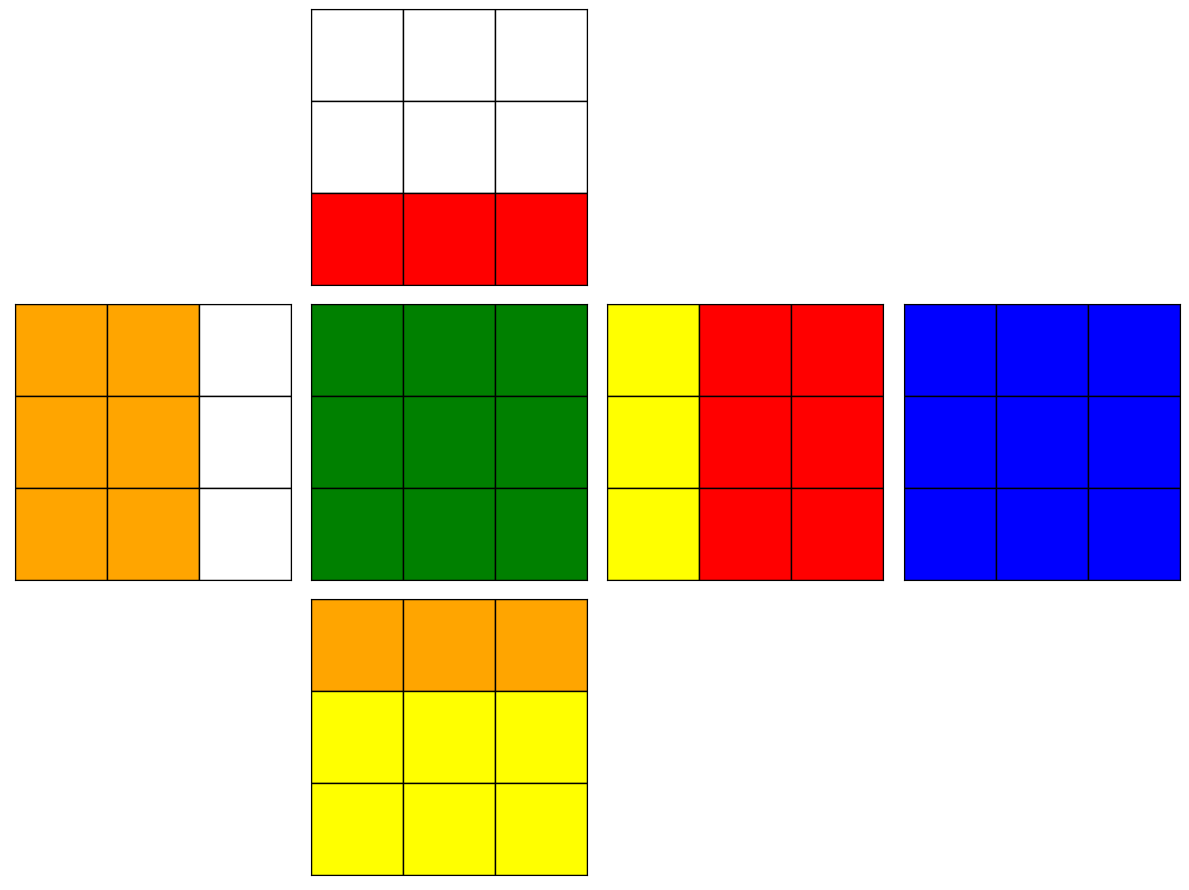

In [56]:
def rotate_face(cube_configuration, face, clockwise=True):
    neighbors = {
        # Face: [neighbor1, neighbor2, neighbor3, neighbor4]
        'U': ['B', 'R', 'F', 'L'],
        'L': ['U', 'F', 'D', 'B'],
        'F': ['U', 'R', 'D', 'L'],
        'R': ['U', 'B', 'D', 'F'],
        'B': ['U', 'L', 'D', 'R'],
        'D': ['F', 'R', 'B', 'L']
    }
    # Rotate the face itself
    if clockwise:
        cube_configuration[face] = np.rot90(cube_configuration[face])
    
        # Saves in a temporary variable the colors of the last column of neighbors4
        temp = ['', '', '']
        for i in range(3):
            temp[i] = cube_configuration[neighbors[face][3]][i, 2]

        # Puts the color of the first row of neighbors3 in the last column of neighbors4
        for i in range(3):
            cube_configuration[neighbors[face][3]][i, 2] = cube_configuration[neighbors[face][2]][0, i]

        # Puts the color of the first column of neighbors2 in the first row of neighbors3
        for i in range(3):
            cube_configuration[neighbors[face][2]][0, i] = cube_configuration[neighbors[face][1]][i, 0]

        # Puts the color of the last row of neighbors1 in the first column of neighbors2
        for i in range(3):
            cube_configuration[neighbors[face][1]][i, 0] = cube_configuration[neighbors[face][0]][2, i]

        # Puts the color of the first column of neighbors4 in the last row of neighbors1
        for i in range(3):
            cube_configuration[neighbors[face][0]][2, i] = temp[i]
    else:
        cube_configuration[face] = np.rot90(cube_configuration[face])

        # Saves in a temporary variable the colors of the last column of neighbors4
        temp = ['', '', '']
        for i in range(3):
            temp[i] = cube_configuration[neighbors[face][3]][i, 2]

        # Puts the color of the last row of neighbors1 in the last column of neighbors4
        for i in range(3):
            cube_configuration[neighbors[face][3]][i, 2] = cube_configuration[neighbors[face][0]][2, i]

        # Puts the color of the first column of neighbors2 in the last row of neighbors1
        for i in range(3):
            cube_configuration[neighbors[face][0]][2, i] = cube_configuration[neighbors[face][1]][i, 0]

        # Puts the color of the first row of neighbors3 in the first column of neighbors2
        for i in range(3):
            cube_configuration[neighbors[face][1]][i, 0] = cube_configuration[neighbors[face][2]][0, i]

        # Puts the color of the last column of neighbors4 in the first row of neighbors3
        for i in range(3):
            cube_configuration[neighbors[face][2]][0, i] = temp[i]
    
    return cube_configuration


cube_configuration = rotate_face(cube_configuration, 'F', clockwise=False)
plot_cube(cube_configuration)
        